# Evaluation

In [1]:
import pandas as pd
import evaluate
from tqdm import tqdm
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import matplotlib.pyplot as plt

c:\Users\kadav\VSCodeProjects\PMLDL\Assignment\text-detoxification\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Prepare data

In [2]:
df = pd.read_csv("../data/raw/suitable.csv", index_col=0)
seed = 177013
train = df.sample(10000, random_state=seed)
val = df.drop(train.index).sample(1000, random_state=seed)
test = df.drop(train.index).drop(val.index).sample(1000, random_state=seed)
df = test
df_bart = pd.read_csv("../data/interim/bart_pred.csv", index_col=0)
df['bart'] = df_bart['generated']
df_t5 = pd.read_csv("../data/interim/t5_pred.csv", index_col=0) 
df['t5'] = df_t5['generated']
df

,toxic,non-toxic,bart,t5
399522,I'll show you who's got bigger butts on this s...,I'll show you who's got The bigger bottom roun...,I'll show you who's got more cigarettes on thi...,I'll show you who's bigger on this station!
32832,"""I sit on the floor and pick my nose and think...","""I sit down and I pick my nose, and on my nose...","""I sit on the floor and pick at people's shoes...","""I sit on the floor and pick my nose and think..."
126205,did you know I really thought this grease monk...,"You know, I thought that greaser really did tu...",Did you know I really thought that this crooke...,did you know I thought this grease monkey was ...
151854,"Just go, tyler, get the hell away from me.","go, Tyler, get away from me.","go, tyler, get away from me.","just go, tyler, get away from me."
218096,"'You're putrid, you know that?' Danny said.","""you're cute, you know?"" Said Danny.","""you're in trouble, you know that?"" Danny said.","""You know what?"" Danny asked."
...,...,...,...,...
47605,With big ass lips!,he's got big lips!,with big lips!,with big lips!
452350,they told me some stupid friend of yours was a...,"They've told me, some incapable friend of you....",They said some of your friends accidentally ra...,they told me that some friend of yours was acc...
434708,they're a bunch of losers.,This lot are a bunch of fairies.,They're a bunch of teenagers.,they're a bunch of losers.
78703,let's finish him off.,Let's get it down here.,Let's get him out of here.,Let's finish him off.


## Calculate toxicity level with roberta_toxicity_classifier

In [3]:
def measure_toxicity(texts, batch_size = 64):
    labels = []
    tokenizer = RobertaTokenizer.from_pretrained('SkolkovoInstitute/roberta_toxicity_classifier')
    model = RobertaForSequenceClassification.from_pretrained('SkolkovoInstitute/roberta_toxicity_classifier')

    for i in tqdm(range(0, len(texts), batch_size)):
        batch = tokenizer(texts[i:i + batch_size], return_tensors='pt', padding=True)
        labels.extend(model(**batch)['logits'].argmax(1).float().data.tolist())
    return labels

In [4]:
df['toxic_label'] = measure_toxicity(df['toxic'].to_list())
df['non-toxic_label'] = measure_toxicity(df['non-toxic'].to_list())
df['bart_label'] = measure_toxicity(df['bart'].to_list())
df['t5_label'] = measure_toxicity(df['t5'].to_list())

Some weights of the model checkpoint at SkolkovoInstitute/roberta_toxicity_classifier were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 16/16 [00:30<00:00,  1.91s/it]
Some weights of the model checkpoint at SkolkovoInstitute/roberta_toxicity_classifier were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you a

In [5]:
df

,toxic,non-toxic,bart,t5,toxic_label,non-toxic_label,bart_label,t5_label
399522,I'll show you who's got bigger butts on this s...,I'll show you who's got The bigger bottom roun...,I'll show you who's got more cigarettes on thi...,I'll show you who's bigger on this station!,1.0,0.0,0.0,0.0
32832,"""I sit on the floor and pick my nose and think...","""I sit down and I pick my nose, and on my nose...","""I sit on the floor and pick at people's shoes...","""I sit on the floor and pick my nose and think...",1.0,0.0,0.0,0.0
126205,did you know I really thought this grease monk...,"You know, I thought that greaser really did tu...",Did you know I really thought that this crooke...,did you know I thought this grease monkey was ...,1.0,0.0,1.0,1.0
151854,"Just go, tyler, get the hell away from me.","go, Tyler, get away from me.","go, tyler, get away from me.","just go, tyler, get away from me.",0.0,0.0,0.0,0.0
218096,"'You're putrid, you know that?' Danny said.","""you're cute, you know?"" Said Danny.","""you're in trouble, you know that?"" Danny said.","""You know what?"" Danny asked.",1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
47605,With big ass lips!,he's got big lips!,with big lips!,with big lips!,1.0,0.0,0.0,0.0
452350,they told me some stupid friend of yours was a...,"They've told me, some incapable friend of you....",They said some of your friends accidentally ra...,they told me that some friend of yours was acc...,1.0,1.0,0.0,0.0
434708,they're a bunch of losers.,This lot are a bunch of fairies.,They're a bunch of teenagers.,they're a bunch of losers.,1.0,0.0,0.0,1.0
78703,let's finish him off.,Let's get it down here.,Let's get him out of here.,Let's finish him off.,1.0,0.0,0.0,1.0


In [6]:
tl_toxic = df['toxic_label'][df['toxic_label']==1].count()/len(df)
tl_nontoxic = df['non-toxic_label'][df['non-toxic_label']==1].count()/len(df)
tl_bart = df['bart_label'][df['bart_label']==1].count()/len(df)
tl_t5 = df['t5_label'][df['t5_label']==1].count()/len(df)

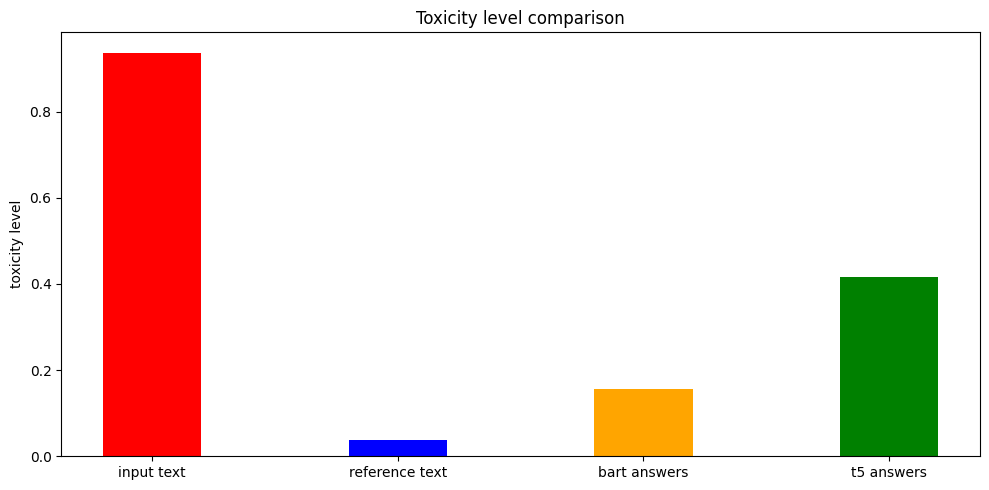

In [7]:
data = {'input text':tl_toxic, 'reference text':tl_nontoxic, 'bart answers':tl_bart, 't5 answers':tl_t5}
names = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
bar_colors = ['red', 'blue', 'orange', 'green']
 
plt.bar(names, values, color = bar_colors, width = 0.4)

plt.ylabel("toxicity level")
plt.title("Toxicity level comparison")
plt.tight_layout()
plt.savefig("../reports/figures/toxicity_levels.png")
plt.show()

## Setup metrics

More about this metrics are [here](https://habr.com/ru/articles/745642/) and [here](https://habr.com/ru/companies/amvera/articles/691288/)

In [8]:
bleu_metric = evaluate.load("bleu")
meteor_metric = evaluate.load("meteor")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kadav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kadav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kadav\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [9]:
def calculate_metrics(references, predictions):
    bleu_scores = []
    meteor_scores = []
    
    for i in tqdm(range(len(references))):
        inputs = [predictions[i]]
        refs = [references[i]]

        bleu_score = bleu_metric.compute(predictions=inputs, references=refs)
        bleu_scores.append(bleu_score["bleu"])

        meteor_score = meteor_metric.compute(predictions=inputs, references=refs)
        meteor_scores.append(meteor_score["meteor"])
        
    return bleu_scores, meteor_scores

In [10]:
df['bart_bleu'], df['bart_meteor'] = calculate_metrics(df['toxic'].to_list(), df['bart'].to_list())
df['t5_bleu'], df['t5_meteor'] = calculate_metrics(df['toxic'].to_list(), df['t5'].to_list())

100%|██████████| 1000/1000 [00:07<00:00, 126.80it/s]


In [11]:
bart_bleu, bart_meteor = df['bart_bleu'].mean(), df['bart_meteor'].mean() 
t5_bleu, t5_meteor = df['t5_bleu'].mean(), df['t5_meteor'].mean() 

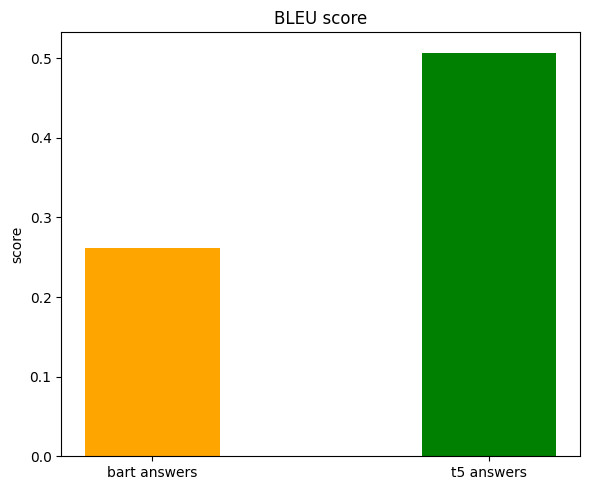

In [12]:
data = {'bart answers':bart_bleu, 't5 answers':t5_bleu}
names = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 5))
bar_colors = ['orange', 'green']
 
plt.bar(names, values, color = bar_colors, width = 0.4)

plt.ylabel("score")
plt.title("BLEU score")
plt.tight_layout()
plt.savefig("../reports/figures/bleu_score.png")
plt.show()

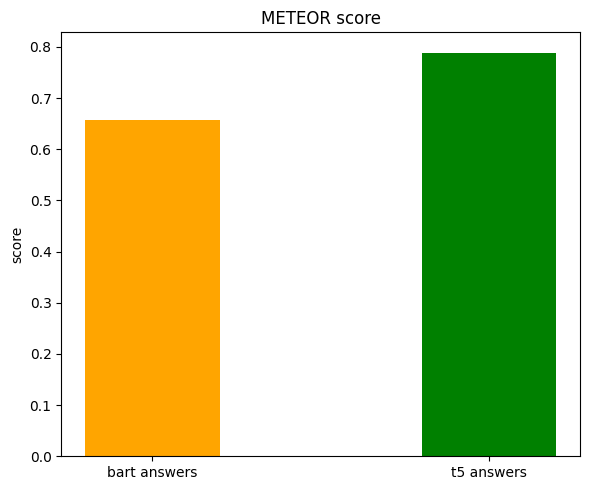

In [13]:
data = {'bart answers':bart_meteor, 't5 answers':t5_meteor}
names = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 5))
bar_colors = ['orange', 'green']
 
plt.bar(names, values, color = bar_colors, width = 0.4)

plt.ylabel("score")
plt.title("METEOR score")
plt.tight_layout()
plt.savefig("../reports/figures/meteor_score.png")
plt.show()